# 2D Data: Correlation and Pairwise Effects

In some datasets, the main question of interest is not about the value of a single variable on its own, but rather about the **relationship between two variables**. 

Important experimental examples would be:

* **paried designs**: where *pairs of participants* are compared, to balance out external variables. For example: 
    * patients and control participants are  *matched* on age and sex before comparing the groups
* **repeated measures designs**, where the *same participant* completes all conditions in the experiment For example:
    * A patient's blood pressure before and after taking a drug
    * Reaction time on the same task with and without distraction
    
Here is a video about paired vs unpaired designs:

In [2]:
%%HTML
<iframe width="560" height="315" src="https://www.youtube.com/embed/yq5RF2MCN7Y?si=1XDbQKpZP-KYSoWG" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" referrerpolicy="strict-origin-when-cross-origin" allowfullscreen></iframe>

If we want to see the relationship between paired measurements, we need a type of plot that shows that relationship. Good examples are:

* `sns.scatterplot()`: *Displays a **scatterplot** showing individual data points, showing the overall pattern and strength of the relationship.*
* `sns.regplot()`: Show **scatterplot with regression line**, or a *line of best fit* which can help visualise the trend and any potential linear relationship between the variables. 
* `sns.histplot()`: A **2D histogram** shows the density of points in each area of the plot, useful when there are many overlapping data points.
* `sns.kde()`: A **2D KDE plot** shows a smoothed density estimate of the joint distribution, giving a contour-style view of where most data lie.

Here is a video about plotting paired measurements:

In [3]:
%%HTML
<iframe width="560" height="315" src="https://www.youtube.com/embed/lVHzI2Ktd_s?si=_112tUvkxO9ESikm" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" referrerpolicy="strict-origin-when-cross-origin" allowfullscreen></iframe>

## Example: brother/sister heights


<img src= "https://raw.githubusercontent.com/jillxoreilly/StatsCourseBook_2024/main/images/tallVshort.jpg" width=30% alt="A picture of people of different heights"  />

A researcher hypothesises that men are taller than women. However, he also notices that there is a considerable genetic influence on height, with some families being taller than others. To control for this, he decides to compare the heights of brothers and sisters. Since the siblings will have a shared genetic influence and shared upbringing he hopes that using a <b>paired</b> design will help answer his main question of interest. 

**Note:** *Datasets with multiple measurements per case are often given in **wide form**: one row per family, and one column per measurement (e.g. `brother`, `sister`). The plotting examples below start from wideform data. A **longform** data file could convey the same information by using columns  like `height`, `sex`, and `familyID`. In this case each row would represent a single person. A solution for ** longform data** is covered briefly at the end of this notebook.*

### Set up Python libraries

As usual, run the code cell below to import the relevant Python libraries

In [4]:
# Set-up Python libraries - you need to run this but you don't need to change it
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import seaborn as sns
sns.set_theme(style='white')
import statsmodels.api as sm
import statsmodels.formula.api as smf
import warnings
warnings.simplefilter('ignore', category=FutureWarning)

### Load and inspect the data

Load the file BrotherSisterData.csv which contains heights in cm for 25 fictional brother-sister pairs

In [5]:
heightData = pd.read_csv('https://raw.githubusercontent.com/jillxoreilly/StatsCourseBook_2024/main/data/BrotherSisterData.csv')
display(heightData)

brother  sister
0       174     172
1       183     180
2       154     148
3       172     180
4       172     165
5       161     159
6       167     159
7       172     164
8       195     188
9       189     175
10      161     160
11      181     177
12      175     168
13      170     169
14      175     165
15      169     164
16      169     163
17      180     176
18      180     176
19      180     172
20      175     170
21      162     157
22      175     172
23      181     179
24      173     171

### Independent KDE plots

Let's use a KDE plot to compare the heights of the men (brothers) and women (sisters) in the sample. 

We’ll do this by calling the `sns.kdeplot()` function **twice**: once for the brothers’ heights and once for the sisters’ heights. 

*Note: By default, Seaborn will continue adding each new plot to the same figure until you explicitly call `plt.show()`*.

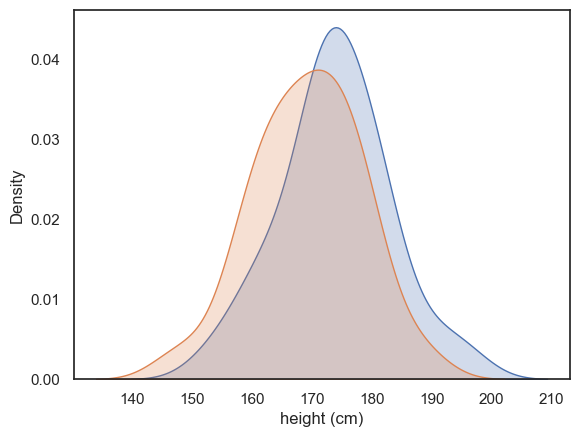

In [16]:
sns.kdeplot(data=heightData, x = "brother", fill=True)
sns.kdeplot(data=heightData, x = "sister", fill=True)
plt.xlabel('height (cm)')
plt.show()

There’s quite a bit of overlap between the two distributions, with just a hint that the men tend to be taller than the women on average.

However, by comparing *all* the men to *all* the women ignores the power of our **paired design**! We deliberated measured brother-sister pairs in the hope of "cancelling out" shared genetic or environmental influences within families. We therefore need to ask if each brother is taller than his own sister. To do this we will next turn to a **scatterplot**

## Scatterplot

A scatter plot lets us visualise the paired nature of our data directly. Here, each dot represents a pair of siblings.

* The x-axis shows the brother’s height.
* The y-axis shows the sister’s height.

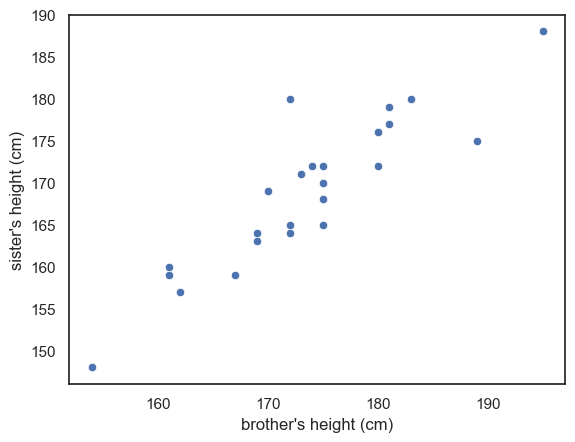

In [17]:
sns.scatterplot(data=heightData, x='brother', y='sister')
plt.xlabel("brother's height (cm)")
plt.ylabel("sister's height (cm)")
plt.show()

#### Between-pairs effect (correlation)

From the scatter plot above, you can immediately see that there appears to be a relationship - or **correlation** - between the brothers’ and sisters’ heights. In other words, men that are generally tall, seem to have sisters that are also tall. 

This correlation supports the idea that that genetic and environmental factors influence height and confirms that using a **paired design** was a sensible choice. By pairing siblings from the same family we effectively control for these shared influences. However, the correlation alone does not yet answer our main question:

* *Are men taller than women*

The key advantage of this design is taht it allows us to cancel out the large variation between families, so we can focus on detecting much smaller difference betweeen mailes and females within each family. 

#### Within-pairs effect (pairwise difference)

In this study, the family effect is actually "noise". What we really want to know, is not whether some families are overall taller, but rather whether the male sibling in each family is taller than the female sibling once the family effect is accounted for.

We can visualise this by adding a **reference line** to our scatter plot. 

### Reference line

By drawing a line where $x=y$ we can a point of reference to better understand the overall effect of gender on height

* If all the brothers were exactly the same height as their sisters then all data points would fall exactly on the line $x=y$
* If brothers were roughly the same height as their sisters (with some random variation) we would expect the data points to fall equally often above and below the line $x=y$
* If brothers are generally taller than their sisters, most of the datapoints will fall on one side of the line (think about which!)

To add the line $x=y$ we use the `matplotlib` function `plt.plot()`. The arguments of this function are the $x$ and $y$ coordinates of the line's endpoints (here, both range from 150-190), and the argument 'r--' which sets the color (red) and line type (dashed).


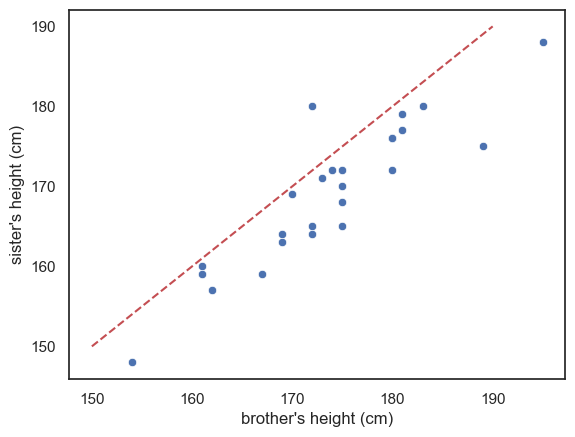

In [34]:
sns.scatterplot(data=heightData, x='brother', y='sister')
plt.xlabel("brother's height (cm)")
plt.ylabel("sister's height (cm)")
plt.plot([150, 190],[150, 190], 'r--')
plt.show()

Look at the graph - most of the datapoints fall on one side of the line (below it)

* This means that **either** most of the brothers are taller than their sisters, **or** vice versa - which is it? Make sure you can tell this by looking at the plot. 

#### Exercise

* *See if you can add another line of code to draw a red horizontal line at $y=170$*

### Reference line is not a regression line!!
    
More commonly, when you see a line on a scatter plot, the line is a regression line (more detail below). It can be helpful to add other reference lines, such as the line $x=y$ but these carry very different meanings from the more common regression line. To make sure your plot is clear, I suggest you use obvious colouring for reference lines (eg a red dashed line) to distinguish them from a regression line,. It should also be **clearly state in the figure description** (ie the text under the figure) that the red dashed line is the line $x=y$ for reference

## Scatterplot with regression line

Sometimes we *are* actually interested in the **between-pairs effect**. For example, how strongly the brothers' and sisters' heights are related. For example, we might be interested in the shared effect of genetics/environment, and would like to make a prediction along the lines like: *For each additional cm in height of the brother, we expect the height of his sister to increase by 0.8cm*

This kind of statement comes from a regression analysis, which formally estimates the relationship between two variables. We will cover regression analysis in more detail later in the course

For now, let’s just look at a version of the scatter plot that includes the best-fitting regression line, using Seaborn’s `sns.regplot()` function:

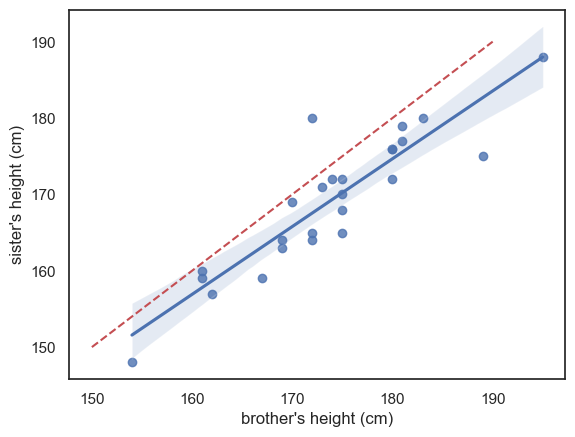

In [35]:
sns.regplot(data=heightData, x='brother', y='sister')
plt.plot([150, 190],[150, 190], 'r--')
plt.xlabel("brother's height (cm)")
plt.ylabel("sister's height (cm)")
plt.show()

The blue line is the regression line (and the shading represents a confidence interval for the regression line - we will cover confidence intervals in detail later but basically, it reflects the fact that we are not totally sure this sample reflects all men and women in the popluation; we expect the 'true' regression line to fall somewhere in the shaded region)

I've also included (red dashed line) the line $x=y$ for reference - we can see that the regression line ***is not the same*** as the line $x=y$ - it falls to one side of $x=y$ and has a slightly different slope.

If these ideas (regression line and confidence interval) are unfamiliar please think no more about it - they will be covered later in the course, but I mention this plot here so you will have available all of the commonly used plots in one chapter for revision.

## Jointplot

A limitation of the scatterplot is that we lose the ability to see the **shape of each individual distribution** (brothers' and sisters' heights), which we would normally get from a histogram or KDE plot. Because of this, we can't tell from the scatterplot if:

* the distribution of heights symmetrical or skewed?
* the distribution unimodal or bimodal

We can get *the best of both worlds* by using <tt>seaborn</tt> function `sns.jointplot()`. This shows the relationship between two variables in the center using a scaller plot but it also shows the <b>marginal</b> distributions - the seperate distributions for each variable - along the top and right-hand sides.

This gives us both the pairwise relationship and the shape of each distribution in one combined figure.

[]

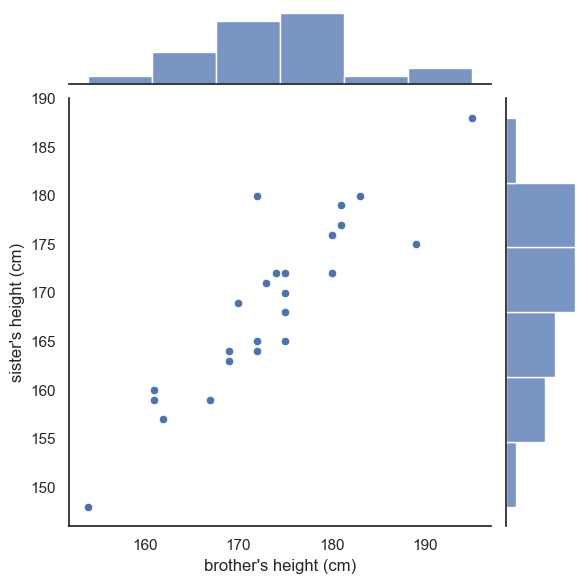

In [36]:
sns.jointplot(data=heightData, x='brother', y='sister', )
plt.xlabel("brother's height (cm)")
plt.ylabel("sister's height (cm)")
plt.plot()

This plot is now made up of **three axes**: the main scatter plot, and the two marginal histograms. Therefore, if we want to adjust one of those axes, we use a set of arguments in a `dictionary`:

* `marginal_kws` are keyword argumments for the marginal histograms
* `joint_kws` are keyword arguments for the scatterplot itself

You can probably just copy this syntax without worrying too much about understanding it as we don't make heavy use of dictionaries in this course.

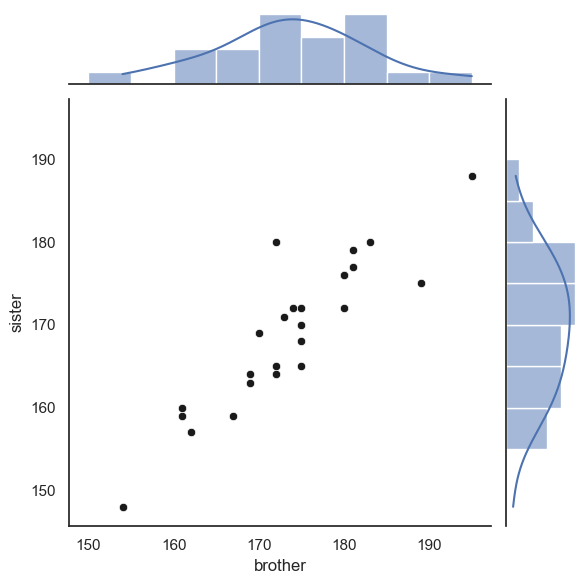

In [42]:
sns.jointplot(data=heightData, x='brother', y='sister', kind='scatter', 
              marginal_kws=dict(bins=range(150,200,5), kde="true"), 
              joint_kws=dict(color='k'))
plt.show()


Finally, we can add the line $x=y$. 

This is a little fiddly and you will not be required to do this in an assessment - however I include it for your future reference

As the plot consists of several axes, we have to tell the computer which part of the the joint plot to add the line to, by getting a *handle* to the plot (see comments in the code)

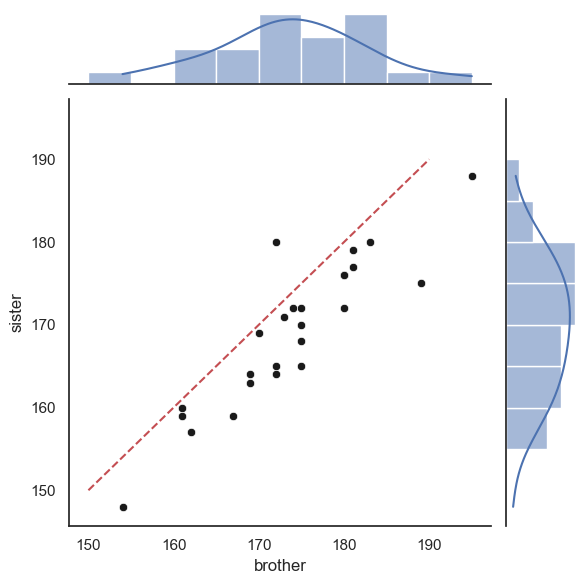

In [43]:
# create the joint plot as before but give it a label - "myfig"
myfig = sns.jointplot(data = heightData, x='brother', y='sister', kind='scatter',
                      marginal_kws=dict(bins=range(150,200,5), kde="true"),
                      joint_kws=dict(color='k'))

# plot the line x=y onto the joint axis (ax_joint) of myfig
myfig.ax_joint.plot([150,190],[150,190],'r--')

plt.show()

## 2D Histogram

The Seaborn functions `sns.histplot()` and `sns.kdeplot()` can be used to visualise two-dimensional data. They can highlight how two variables relate in terms of their *joint frequency* or density.

Below is a 2D histogram for our brother–sister height data, with a scatter plot overlaid on top for reference:

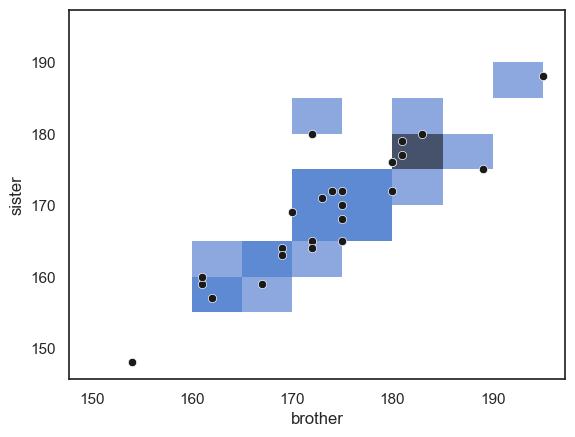

In [44]:
sns.histplot(data=heightData, x='brother', y='sister', bins=range(150,200,5))
sns.scatterplot(data=heightData, x='brother', y='sister', color='k')

plt.show()

... Note that the areas (squares) with more data points in them are shaded darker blue. However, in this example the plot isn’t particularly informative. With relatively few data points, small differences in where the points happen to fall can exaggerate apparent patterns, just like what we saw with a one-dimensional histogram based on a small sample.

### Large datasets

A 2D histogram (or its smoother equivalent, a 2D KDE plot) becomes much more useful when working with large datasets, where a traditional scatter plot would become cluttered or unreadable.

For example, consider the following dataset containing **height**, **weight**, and **gender** information for 10,000 (fictional) people. *Note these are no longer pairs of siblings!*

In [45]:
hws = pd.read_csv('https://raw.githubusercontent.com/jillxoreilly/StatsCourseBook_2024/main/data/weight-height.csv')
display(hws)

Gender     Height      Weight
0       Male  73.847017  241.893563
1       Male  68.781904  162.310473
2       Male  74.110105  212.740856
3       Male  71.730978  220.042470
4       Male  69.881796  206.349801
...      ...        ...         ...
9995  Female  66.172652  136.777454
9996  Female  67.067155  170.867906
9997  Female  63.867992  128.475319
9998  Female  69.034243  163.852461
9999  Female  61.944246  113.649103

[10000 rows x 3 columns]

Let's try making a scatterplot of the data:

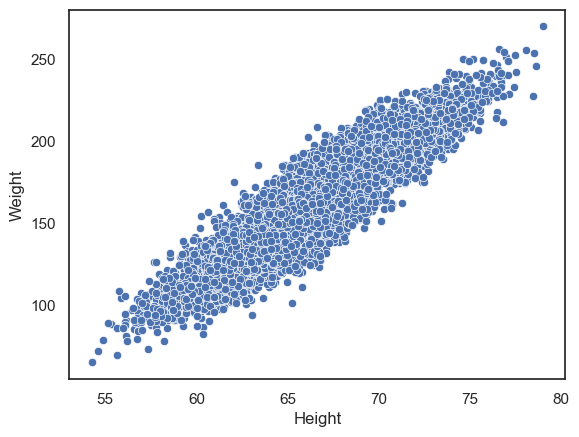

In [51]:
sns.scatterplot(data=hws, x='Height', y='Weight')
plt.show()

We can clearly see a positive correlation between height and weight such that taller people tend to weigh more. However, with such a large dataset, the points are packed so closely together that it’s difficult to see any detail in the relationship.

We can try instead to plot a 2D histogram:

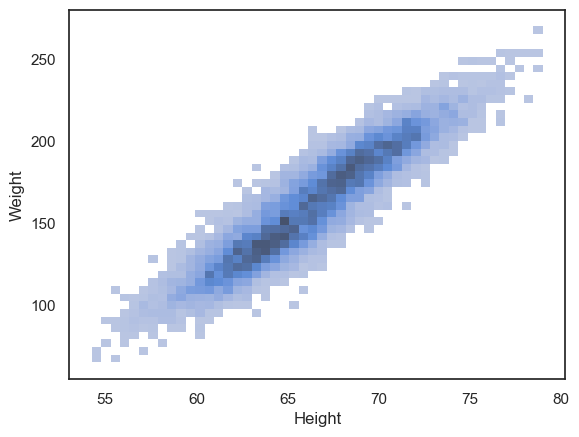

In [53]:
sns.histplot(data=hws, x='Height', y='Weight')
plt.show()

We can now see that the density of data points is highest in the centre of the cloud, and interestingly, there appears to be a hint of two separate peaks within the overall distribution. If you look closely, you’ll notice that the darkest region of the histogram dips slightly in the middle — suggesting that the data may actually come from two overlapping groups.

This becomes clearer when we plot the data separately for men and women:

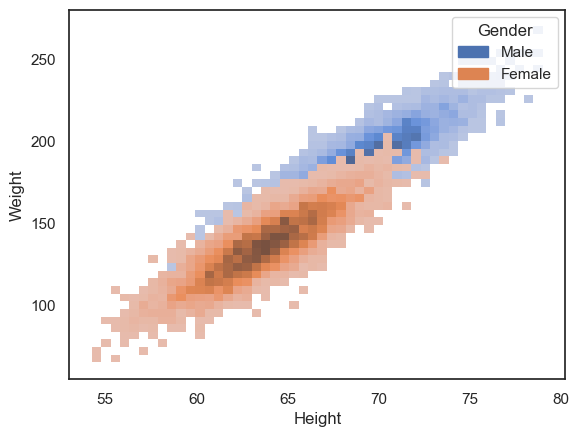

In [54]:
sns.histplot(data=hws, x='Height', y='Weight', hue='Gender')
plt.show()

However, the data cloud for women is now occluding the data cloud for men.

Another option is to use the 2D KDE plot, which produces a kind of contour map (equivalent to the kind fo map you would take hill walking):

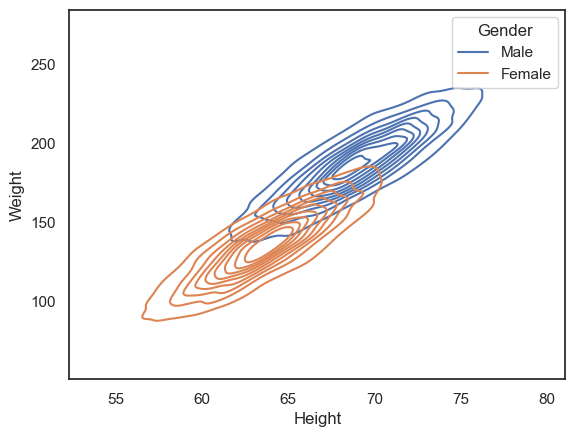

In [55]:
sns.kdeplot(data=hws, x='Height', y='Weight', hue='Gender')
plt.show()

### Customization

All the plots above can be customized to highlight features of interest in the data.

Particularly relevant tweaks for these plot types are:

- `alpha` - a number between 0 and 1 - makes plots semi-transparent when close to 0
- `colormap`

You can learn more on the `seaborn` reference pages for <a href=https://seaborn.pydata.org/generated/seaborn.histplot.html><tt>sns.histplot()</tt></a>, <a href=https://seaborn.pydata.org/generated/seaborn.kdeplot.html><tt>sns.kdeplot()</tt></a> and <a href=https://seaborn.pydata.org/generated/seaborn.scatter.html><tt>sns.scatter()</tt></a>.

## Longform vs wideform data

Data tables can be either longform, or wideform. 

In wideform (as in the examples above), each row corresponds to one 'case' or 'record' and each column corresponds to one variable

In the two examples above we have:
* records = families; variables = height of brother, height of sister
* records = individuals; variables = sex, height, weight

In longform data, the grouping variables are given in a column - for example in the following longform version of the brother/sister heights data, we can tell which brother and sister belong to the same family by checking the `familyID` variable.



In [56]:
heightDataLongform = pd.read_csv('https://raw.githubusercontent.com/jillxoreilly/StatsCourseBook_2024/main/data/BrotherSisterDataLongform.csv')
heightDataLongform

familyID     sex  height
0     410119    Male     174
1     438181    Male     183
2     260033    Male     154
3     330754    Male     172
4     118173    Male     172
5     218511    Male     161
6     934515    Male     167
7     936244    Male     172
8     608784    Male     195
9     700114    Male     189
10    902900    Male     161
11    327878    Male     181
12    714099    Male     175
13    136536    Male     170
14    483548    Male     175
15    992816    Male     169
16    427440    Male     169
17    809371    Male     180
18    578843    Male     180
19    342207    Male     180
20    565176    Male     175
21    626851    Male     162
22    185965    Male     175
23    165826    Male     181
24    819334    Male     173
25    410119  Female     172
26    438181  Female     180
27    260033  Female     148
28    330754  Female     180
29    118173  Female     165
30    218511  Female     159
31    934515  Female     159
32    936244  Female     164
33    608784  Female     188
34    700114  Female     175
35    902900  Female     160
36    327878  Female     177
37    714099  Female     168
38    136536  Female     169
39    483548  Female     165
40    992816  Female     164
41    427440  Female     163
42    809371  Female     176
43    578843  Female     176
44    342207  Female     172
45    565176  Female     170
46    626851  Female     157
47    185965  Female     172
48    165826  Female     179
49    819334  Female     171


When we have multiple measurements one individual, wideform often seems more natural. Examples in which we would have multiple measurements for one individual are:
* test scores before- and after- an intervention
* multiple health metrics such as weight, blood pressure and pulse
* responses to multiple questions in a survey
* data on a single variable for paired individuals (such as height of brother/sister or husband/wife pairs)

Why would we ever use the longform format?
* when the number of measurements in each 'record' or 'group' is variable (eg heights of all siblings in each family - the number of siblings will vary across families)
* Your data is recorded *per trial*

## Converting longform to wideform

To convert longform data to wideform (for use with plotting functions such as `sns.scatterplot` and `sns.regplot`) we use the `pandas` function `df.pivot`

We need to tell `df.pivot` which variable to group by (that is, which variable indexs the datapoints that belong together), which variable to use to sort data into different columns, and which variable contains the data values (that will eventually be plottted).

Here is how it works for converting the brother/sister heights longform data into wideform:

In [58]:
heightDataWideform = heightDataLongform.pivot(index='familyID', columns='sex', values='height')
heightDataWideform

sex       Female  Male
familyID              
118173       165   172
136536       169   170
165826       179   181
185965       172   175
218511       159   161
260033       148   154
327878       177   181
330754       180   172
342207       172   180
410119       172   174
427440       163   169
438181       180   183
483548       165   175
565176       170   175
578843       176   180
608784       188   195
626851       157   162
700114       175   189
714099       168   175
809371       176   180
819334       171   173
902900       160   161
934515       159   167
936244       164   172
992816       164   169

From this point, everything works just as before — you can continue exploring and plotting your own data using the same techniques we’ve practised throughout this exercise.

When you first read in your dataset, take a moment to check whether it’s in long or wide form.
This will help you decide which plotting functions (and which syntax) will work best, since some Seaborn functions expect long-form data (one observation per row), while others handle wide-form data directly.

Being aware of your data’s structure will save you time and make your plotting smoother and more intuitive.